# ASSIGNMENT 6 - DOCUMENT CLASSIFICATION

Molly Siebecker and Marley Myrianthopoulos

CUNY SPS

DATA 620

Summer 2024

## INTRODUCTION

In this assignment, we use machine learning to create a prediction model to classify documents as spam or not spam. Our test and train datasets will be created from the UC Irvine Machine Learning Repository's [Spambase](http://archive.ics.uci.edu/dataset/94/spambase) dataset. For this assignment we will be loading the data using code provided by UCI, but a copy of the data is in our GitHub repository [here](https://github.com/Marley-Myrianthopoulos/cunysps_data620/tree/main/homework/620_hw6).

In [387]:
# Code provided by UCI to import data

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 
  
# metadata 
print(spambase.metadata) 
  
# variable information 
print(spambase.variables)


{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

We will use Scikit-Learn to construct our machine learning model.

In [388]:
# Load additional required libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## EXPLORATORY DATA ANALYSIS

First, we investigate the layout of the data.

In [389]:
print(X.head())
print(X.shape)

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  word_freq_conference  char_freq_;  \
0             0.00            0.00  ...                   0.0 

The `X` data frame provides the feature set (recorded as variables) for 4601 emails (recorded as observations).

In [390]:
print(y.head())
print(y.shape)
print(y.value_counts())

   Class
0      1
1      1
2      1
3      1
4      1
(4601, 1)
Class
0        2788
1        1813
Name: count, dtype: int64


The `y` DataFrame provides the classification for each of the emails represented as observations in `X`. A value of 1 indicates that the email is spam, a value of 0 indicates that the email is not spam. The dataset has 1813 spam emails and 2788 emails that are not spam.

## DATA TRANSFORMATION

Our first step is to create a train test split of our data. Of the original 4601 emails, 500 will be sequestered to be used as the final test set. The remaining 4101 will be the training set.

In [391]:
from sklearn.model_selection import train_test_split

test_ratio = 500 / 4601
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = test_ratio,
                                                    random_state = 1989)

Our next step is to see if the data is centered and scaled (meaning it has a mean of 0 and a standard deviation of 1).

In [392]:
X_train.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.00000,4101.000000,4101.000000,...,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000
mean,0.101861,0.199459,0.281224,0.072385,0.307671,0.093933,0.116011,0.10602,0.088369,0.236476,...,0.032331,0.039089,0.141754,0.017558,0.268945,0.074312,0.045988,5.302151,52.519873,280.883199
std,0.303463,1.227722,0.504480,1.477313,0.647663,0.256618,0.398103,0.40563,0.264071,0.620735,...,0.296329,0.248050,0.278780,0.114720,0.841778,0.225840,0.449851,33.200426,201.545722,609.080394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.590000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.277000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.00000,0.000000,0.160000,...,0.000000,0.000000,0.190000,0.000000,0.310000,0.054000,0.000000,3.706000,43.000000,264.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,3.570000,7.270000,11.11000,3.330000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


Since none of the columns have a mean of 0 or a standard deviation of 1, we need to center and scale our data before proceeding.

In [393]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

print(X_train_scaled.describe())

                 0             1             2             3             4   \
count  4.101000e+03  4.101000e+03  4.101000e+03  4.101000e+03  4.101000e+03   
mean   2.728858e-17  2.642228e-17 -7.276956e-17 -1.516032e-17 -3.725108e-17   
std    1.000122e+00  1.000122e+00  1.000122e+00  1.000122e+00  1.000122e+00   
min   -3.357009e-01 -1.624822e-01 -5.575214e-01 -4.900356e-02 -4.751067e-01   
25%   -3.357009e-01 -1.624822e-01 -5.575214e-01 -4.900356e-02 -4.751067e-01   
50%   -3.357009e-01 -1.624822e-01 -5.575214e-01 -4.900356e-02 -4.751067e-01   
75%   -3.357009e-01 -1.624822e-01  2.751206e-01 -4.900356e-02  1.116901e-01   
max    1.462674e+01  1.147023e+01  9.553132e+00  2.893281e+01  1.496692e+01   

                 5             6             7             8             9   \
count  4.101000e+03  4.101000e+03  4.101000e+03  4.101000e+03  4.101000e+03   
mean  -5.890869e-17 -2.079130e-17  1.126196e-17  7.580162e-17 -5.197825e-17   
std    1.000122e+00  1.000122e+00  1.000122e+00  1.

The data is now centered and scaled, so we can proceed to constructing our model.

## MODEL CONSTRUCTION

To train our model, we will implement a train test split. Of the original 4601 emails, 500 will be sequestered to be used as the final test set. The remaining 4101 will be the training set. We will use 10-fold cross-validation to assess the average fit of a KNN model with n neighbors in the training data, and then find the value of n that results in the most accurate predictions.

/Users/marleymyrianthopoulos/.virtualenvs/env_cunysps_data620/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/marleymyrianthopoulos/.virtualenvs/env_cunysps_data620/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/marleymyrianthopoulos/.virtualenvs/env_cunysps_data620/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/marleymyrianthopoulos/.virtualenvs/env_cunysps_data620

Best Results by Mean Accuracy:
    neighbors  mean_accuracy  median_accuracy
0          1       0.911731         0.910976
4          5       0.910754         0.908649
2          3       0.909535         0.907433
6          7       0.907097         0.904997
5          6       0.904414         0.907436


/Users/marleymyrianthopoulos/.virtualenvs/env_cunysps_data620/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/marleymyrianthopoulos/.virtualenvs/env_cunysps_data620/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/marleymyrianthopoulos/.virtualenvs/env_cunysps_data620/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/marleymyrianthopoulos/.virtualenvs/env_cunysps_data620

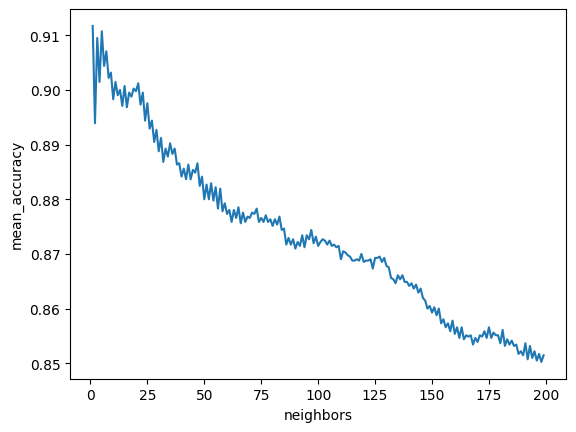



Best Results by Median Accuracy: 
    neighbors  mean_accuracy  median_accuracy
0          1       0.911731         0.910976
4          5       0.910754         0.908649
5          6       0.904414         0.907436
2          3       0.909535         0.907433
6          7       0.907097         0.904997


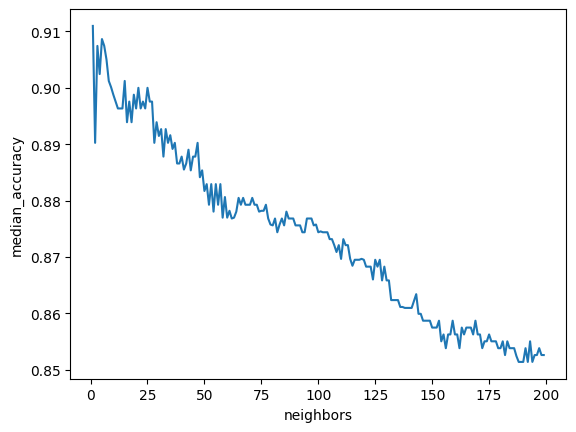

In [394]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits = 10, shuffle = True, random_state = 1989)

knn_mean_accuracy, knn_median_accuracy = [], []
possible_neighbors = np.arange(1,200)
for n in possible_neighbors:
    model = KNeighborsClassifier(n_neighbors = n)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv = kf)
    model_mean_score = np.mean(cv_scores)
    model_median_score = np.median(cv_scores)
    knn_mean_accuracy.append(model_mean_score)
    knn_median_accuracy.append(model_median_score)

knn_results = pd.DataFrame({'neighbors': possible_neighbors,
                            'mean_accuracy': knn_mean_accuracy,
                            'median_accuracy': knn_median_accuracy})

print('Best Results by Mean Accuracy:\n',
      knn_results.sort_values(by = 'mean_accuracy', ascending = False).head())
sns.lineplot(data = knn_results, x = 'neighbors', y = 'mean_accuracy')
plt.show()

print('\n')

print('Best Results by Median Accuracy: \n',
      knn_results.sort_values(by = 'median_accuracy', ascending = False).head())
sns.lineplot(data = knn_results, x = 'neighbors', y = 'median_accuracy')
plt.show()


The KNN model has the best results when using only one nearest neighbor. We can now use it to classify the test set.

In [395]:
final_model = KNeighborsClassifier(n_neighbors = 1)
final_model.fit(X_train_scaled, y_train)
print(final_model.score(X_test_scaled, y_test))


/Users/marleymyrianthopoulos/.virtualenvs/env_cunysps_data620/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.904


Our final model accurately classified 90.4% of emails in the test data set (452 out of 500).

## ANALYZING THE RESULTS

In [396]:
from sklearn.metrics import confusion_matrix
predictions = final_model.predict(X_test_scaled)
print(confusion_matrix(y_test, predictions))

[[285  24]
 [ 24 167]]


Our test data contained $285+24=309$ emails that were not spam. Our model correctly classified 285 of these as not spam and erroneously classified 24 of them as spam. Our test data also contained $167+24=191$ emails that were spam. Our model correctly classified 167 of these as spam and erroneously classified 24 of them as not spam. From these results we can calculate performance metrics for our model.

Our model has an accuracy of $\frac{285+167}{285+24+24+167}=\frac{452}{500}=0.904$, as previously stated. This means that the model's classifications were accurate 90.4% of the time.

Our model has a non-spam precision of $\frac{285}{285+24}=\frac{285}{309}\approx .922$. This means that the model classified non-spam emails correctly about 92.2% of the time.

Our model has a spam precision of $\frac{167}{167+24}=\frac{167}{191}\approx .874$. This means that the model classified spam correctly about 87.4% of the time.

Our model has a non-spam recall of $\frac{285}{285+24}=\frac{285}{309}\approx .922$. This means that about 92.2% of the emails that the model classified as non-spam were actually non-spam.

Our model has a spam recall of $\frac{167}{167+24}=\frac{167}{191}\approx .874$. This means that about 87.4% of the emails that the model classified as spam were actually spam.

For determining if an email is legitimate (not spam), our model has an F1-score of:

$2*\frac{\frac{285}{309}*\frac{285}{309}}{\frac{285}{309}+\frac{285}{309}}=2*\frac{\frac{81225}{95481}}{\frac{570}{309}}=\frac{162450}{95481}*\frac{309}{570}=\frac{50197050}{54424170}\approx 0.922$

This indicates that the model is excellent at determining if an email is legitimate.

For determining if an email is spam, our model has an F1-score of:

$2*\frac{\frac{167}{191}*\frac{167}{191}}{\frac{167}{191}+\frac{167}{191}}=2*\frac{\frac{27889}{36481}}{\frac{334}{191}}=\frac{55778}{36481}*\frac{191}{334}=\frac{10653598}{12184654}\approx 0.874$

This indicates that the model is pretty good at determining if an email is spam.

We can verify these values using scikit-learn's classification report.

In [397]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       309
           1       0.87      0.87      0.87       191

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500

